@Author: Sushant Das
@Date: 09-10-2024
@Last Modified by: Sushant Das
@Last Modified time: 09-10-2024
@Title: Python program to predict apparent temperature for given temperature, humidity, wind speed, visibility, pressure using multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Loading the dataset

In [2]:
weather_df = pd.read_csv("datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


#### Analyzing the dataset

In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


#### Checking for null values

In [4]:
print(weather_df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


#### Checking the percentage of null values

In [5]:
print(weather_df.isnull().sum(axis=0) * 100/len(weather_df))

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64


#### Treating the null values

In [6]:
weather_df = weather_df[weather_df['Precip Type'].notna()]

#### Plotting boxplot to analyze outliers

<Axes: >

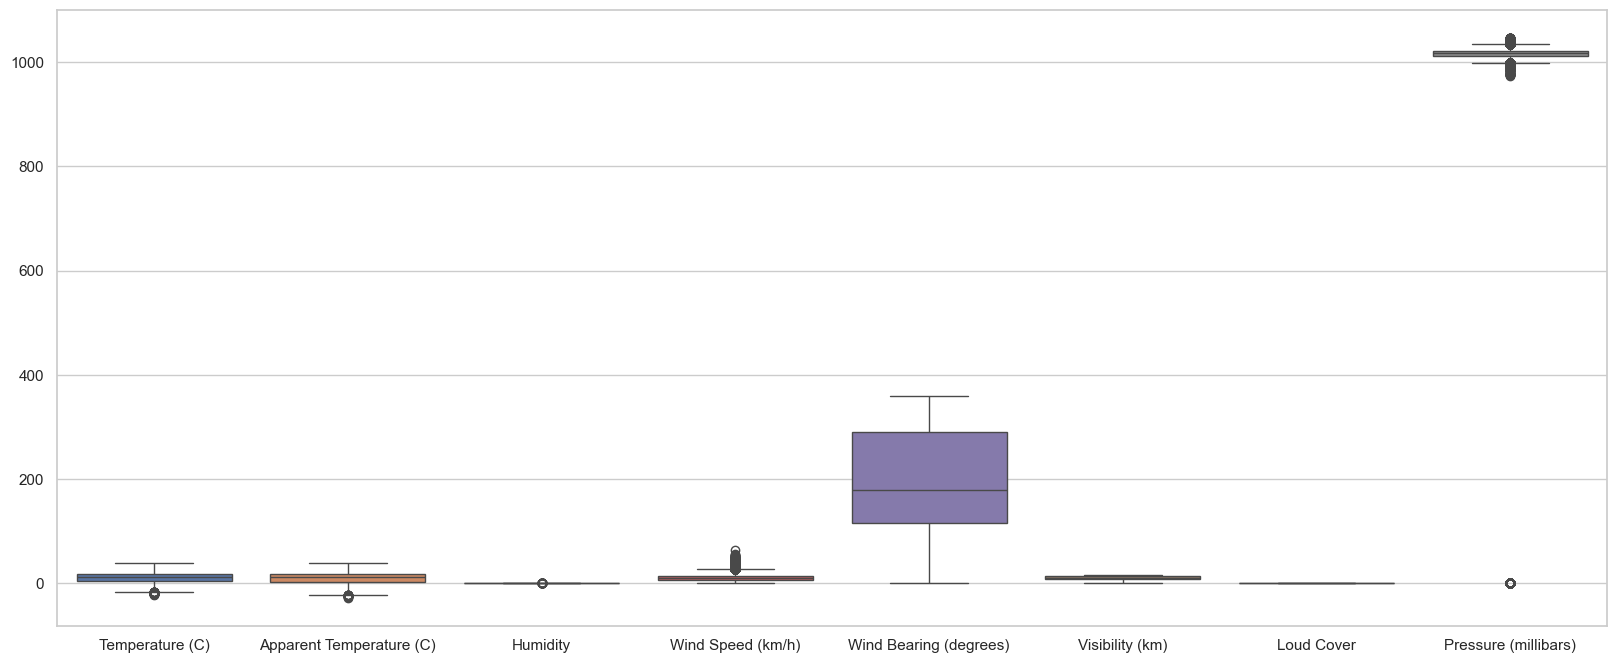

In [7]:
sns.set(rc={'figure.figsize':(20,8)}, style='whitegrid')
sns.boxplot(data=weather_df)

<Axes: xlabel='Humidity'>

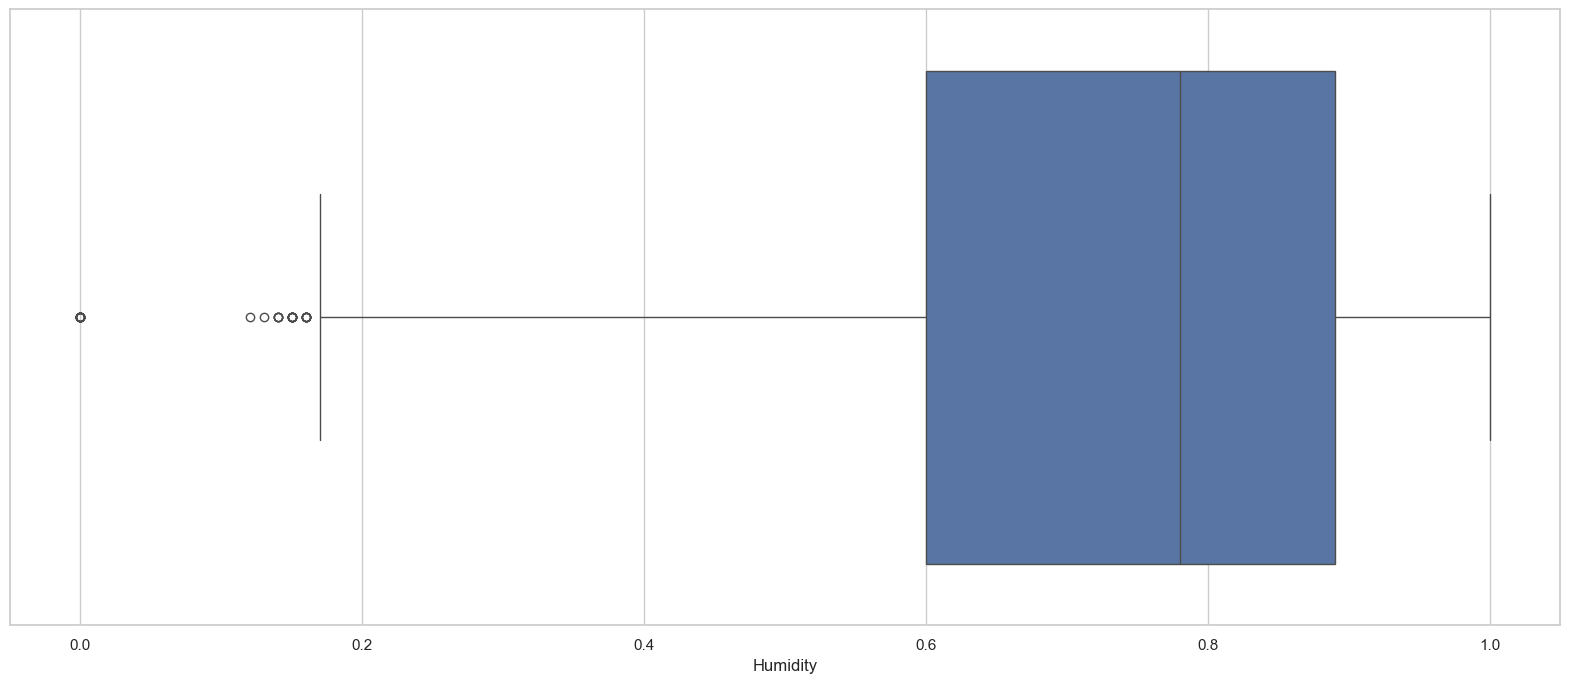

In [8]:
sns.boxplot(x=weather_df['Humidity'])

<Axes: xlabel='Wind Speed (km/h)'>

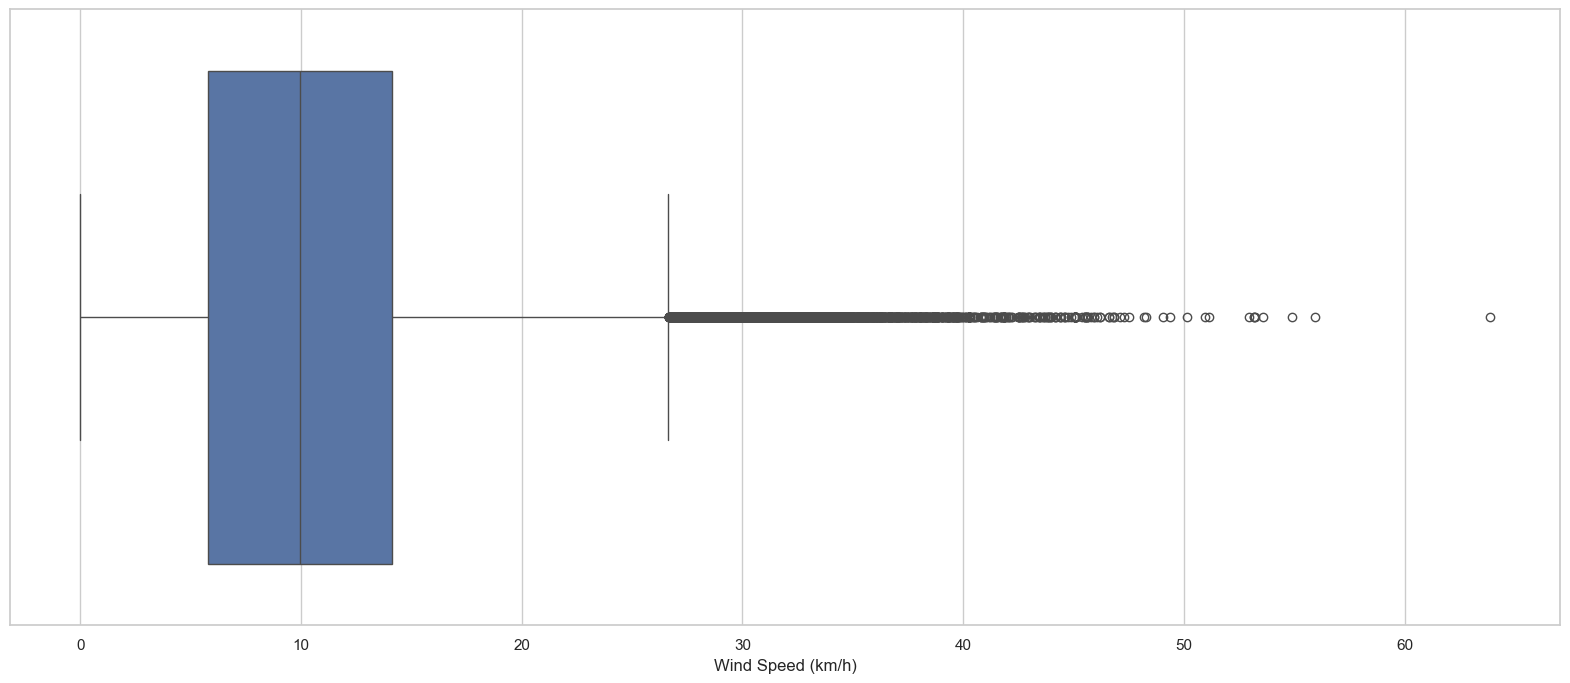

In [9]:
sns.boxplot(x=weather_df['Wind Speed (km/h)'])

<Axes: xlabel='Pressure (millibars)'>

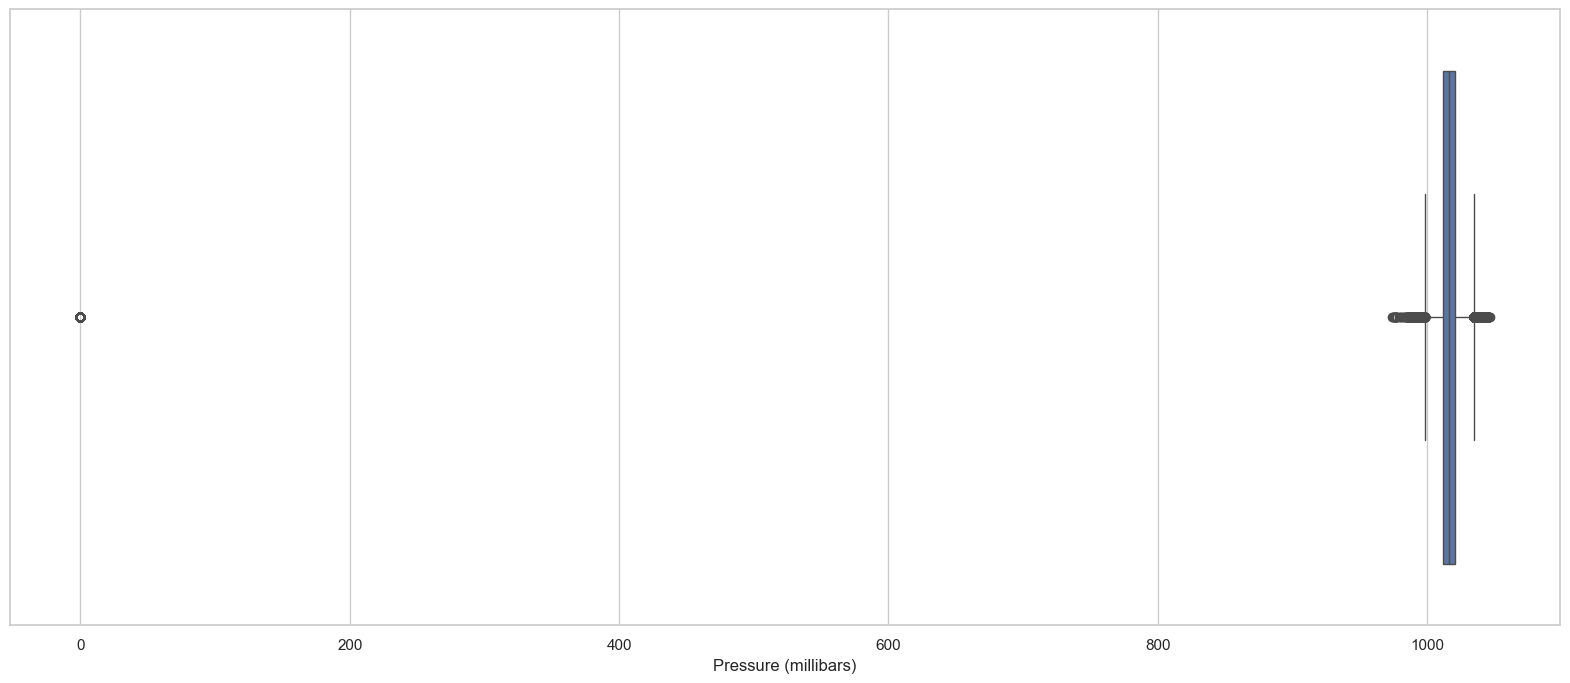

In [10]:
sns.boxplot(x=weather_df['Pressure (millibars)'])

#### Treating the data outliers

In [11]:
weather_df = weather_df[weather_df['Humidity'] != 0.0]
weather_df = weather_df[weather_df['Wind Speed (km/h)'] <= 60]
weather_df = weather_df[weather_df['Pressure (millibars)'] > 0]

#### Splitting the dataset into train and test dataset

In [12]:
x = weather_df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']]
y = weather_df[['Apparent Temperature (C)']]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

#### Standardizing the data

In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Traing the model

In [15]:
model = linear_model.LinearRegression()
model.fit(x_train_scaled, y_train)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: [10.89261146]
Coefficient: [[ 1.08024360e+01  2.43533945e-01 -6.25050758e-01  6.08823851e-02
   5.07711695e-03  1.04678549e-01]]


#### Testing the model

In [16]:
y_pred = model.predict(x_test_scaled)

#### Checking model accuracy

In [19]:
print(f'R2_score : {r2_score(y_test, y_pred)}')

R2_score : 0.989997055019273


In [18]:
mean_squared_error(y_test, y_pred)

1.1493309143300854